Step counter from accelerometer data

In [24]:
import os
import glob
import csv
import numpy as np
import matplotlib.pyplot as plt
import datetime

data_file_path = ""

csv_files = glob.glob('*.csv')
print(result)

['10steps1_accel.csv', 'upstairs_accel.csv', '10steps4_accel.csv', '10steps3_accel.csv', '10steps2_accel.csv', '10steps5_accel.csv', 'downstairs_accel.csv']


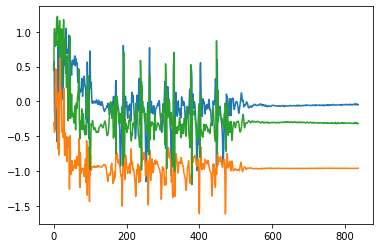

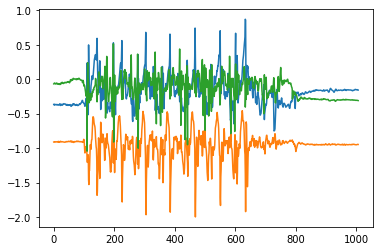

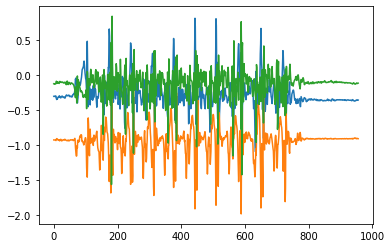

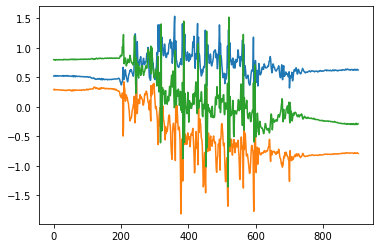

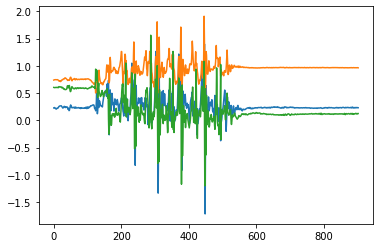

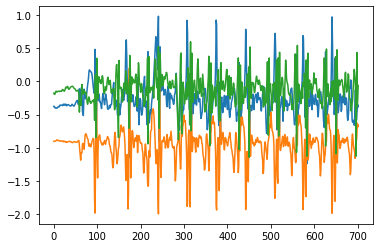

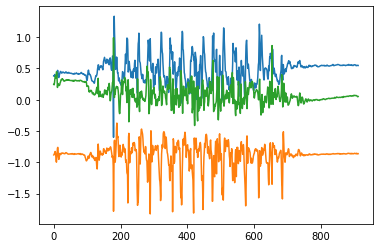

In [25]:
for data_file_path in csv_files:
    data = []
    with open(data_file_path, 'r') as f:
        reader = csv.reader(f, delimiter=',')
        for row in reader: #skip timestamp field
            data.append([row[1],row[2],row[3]])
        data = np.array(data).astype(float)
    plt.plot(data)
    plt.show()    
